In [102]:
import sys
import stylishplot
import empymod
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import emulatte as emu
from emulatte.source import *
from emulatte.halfspace import analytical

In [103]:
def fdem_plot(freq, data, data2=None):
    fc = "#fff"
    tc = "#555"
    fig = plt.figure(figsize=(6,4), facecolor=fc, dpi=200)
    ax = fig.add_subplot(111)
    cc = ["#5bf", "#06a", "#fb5", "#b36"]

    ax.loglog(freq, data.real, c=cc[0], linestyle="-")
    ax.loglog(freq, -data.real, c=cc[0], linestyle=":")
    ax.loglog(freq, data.imag, c=cc[1], linestyle="-")
    ax.loglog(freq, -data.imag, c=cc[1], linestyle=":")

    if not data2 is None:
        ax.loglog(freq, data2.real, c=cc[2], linestyle="--")
        ax.loglog(freq, -data2.real, c=cc[2], linestyle=":")
        ax.loglog(freq, data2.imag, c=cc[3], linestyle="--")
        ax.loglog(freq, -data2.imag, c=cc[3], linestyle=":")

    ax.set_xlim(freq.min(), freq.max())
    #ax.set_ylim(ylim_min, ylim_max)

    ax.set_facecolor(fc)

    ax.grid(which="major", color="#ccc", linewidth=0.5)
    ax.grid(which="minor", color="#eee", linestyle="--", linewidth=0.5)

    # 枠の色
    ax.spines['left'].set_color(tc)
    ax.spines['bottom'].set_color(tc)
    # ラベルの色
    ax.xaxis.label.set_color(tc)
    ax.yaxis.label.set_color(tc)
    # 目盛りの色
    ax.tick_params(axis='x', colors=tc)
    ax.tick_params(axis='y', colors=tc)
    return fig

# VMD

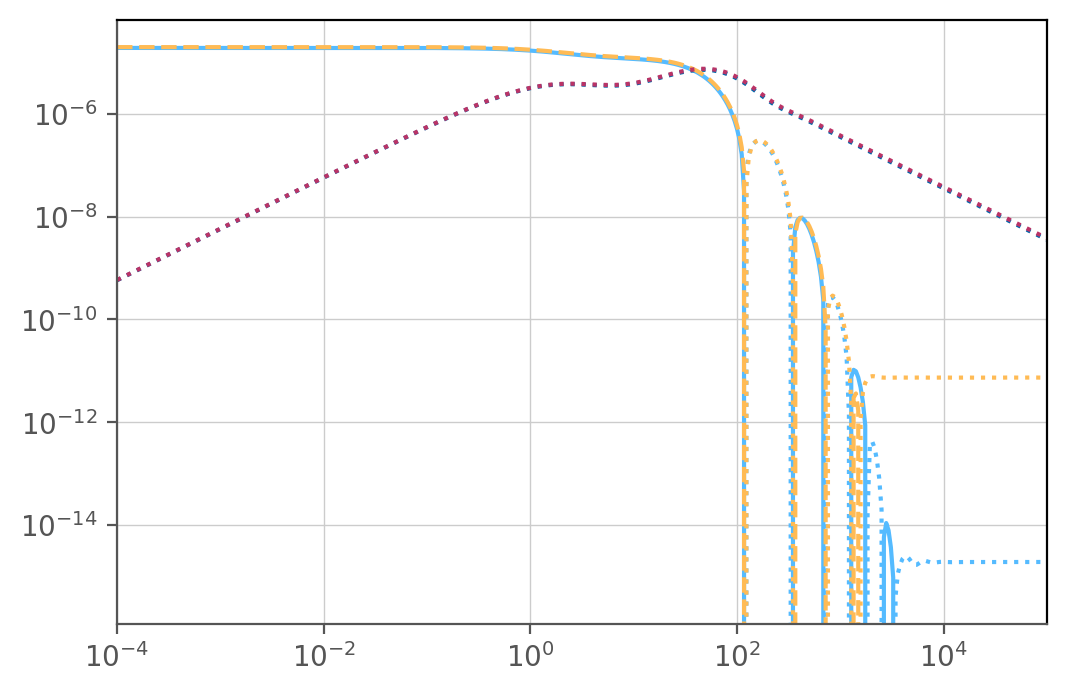

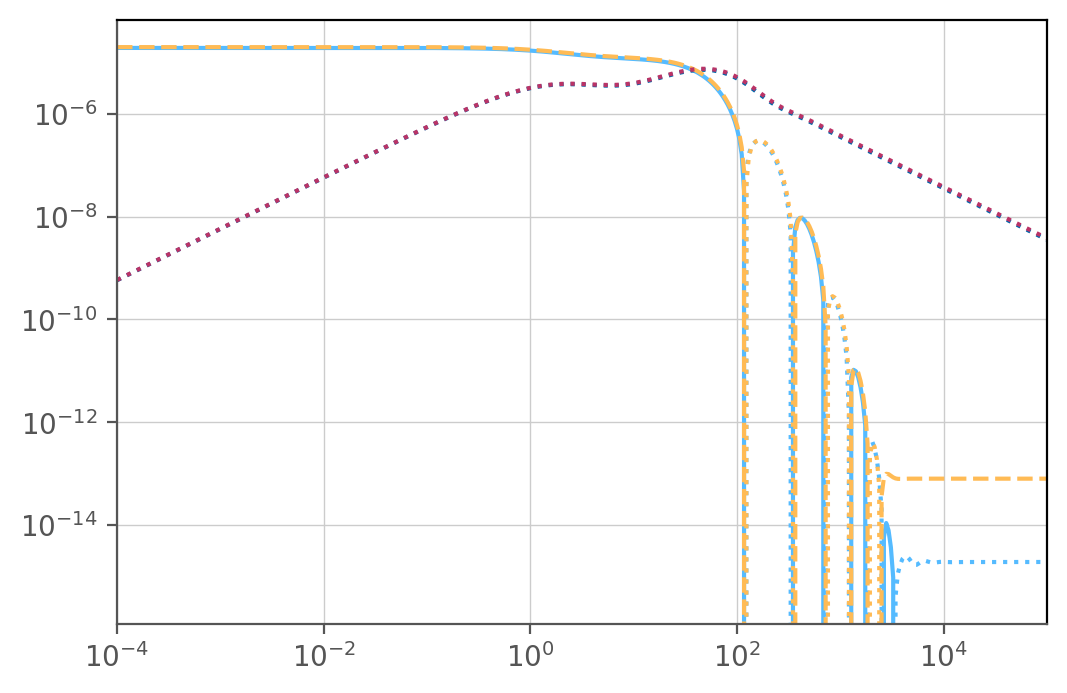

In [104]:
thick = [1000, 100]
res = [100, 1, 100]
freq = np.logspace(-4,5,400)
length = 10 * 2 ** 0.5
sz = 0
rz = 0
ry = 2000
src = [[-500, 0, sz], [500, 0, sz]]
rec = [0, ry, rz]
EH = "H"
xyz = "z"

s = GroundedWire(1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

s = HED(1, 1000, 0)
src = [0, 0, sz]
model = emu.create_model(thick)
model.set_params(res)
#model.set_params_air(1e9, 1, 1)
model.set_source(s, src)
#model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_ed = model.fdem(EH, xyz, rec, freq)

src = [-500, 500, 0, 0, 0, 0]
rec = [0, ry, 0, 0, 90]
# Hx: [0, 1000, 0, 0, 0]
# Hy: [0, 1000, 0, 90, 0]
# Hz: [0, 1000, 0, 0, 90]
depth = [0,1000,1100]
res = [1e12, 100, 1, 100]
strength = 1
mrec = True
ft = 'dlf'
ht = 'dlf'
srcpts = 1


# Computation
inp = {'src': src, 'rec': rec, 'depth': depth, 'res': res,
       'freqtime': freq, 'strength': strength, 'mrec': mrec,
       'verb': 1, 'ft': ft, 'ht': ht, 'epermH': [0, 0, 0, 0]}
#frequency-domain: {'freqtime': freq}
#time-domain: {'freqtime': time}

fhz_num = empymod.bipole(signal=None, **inp)
#time: (signal=-1)
#frequency: (signal=None)

fig = fdem_plot(freq, em_gw, em_ed)
fig = fdem_plot(freq, em_gw, fhz_num)

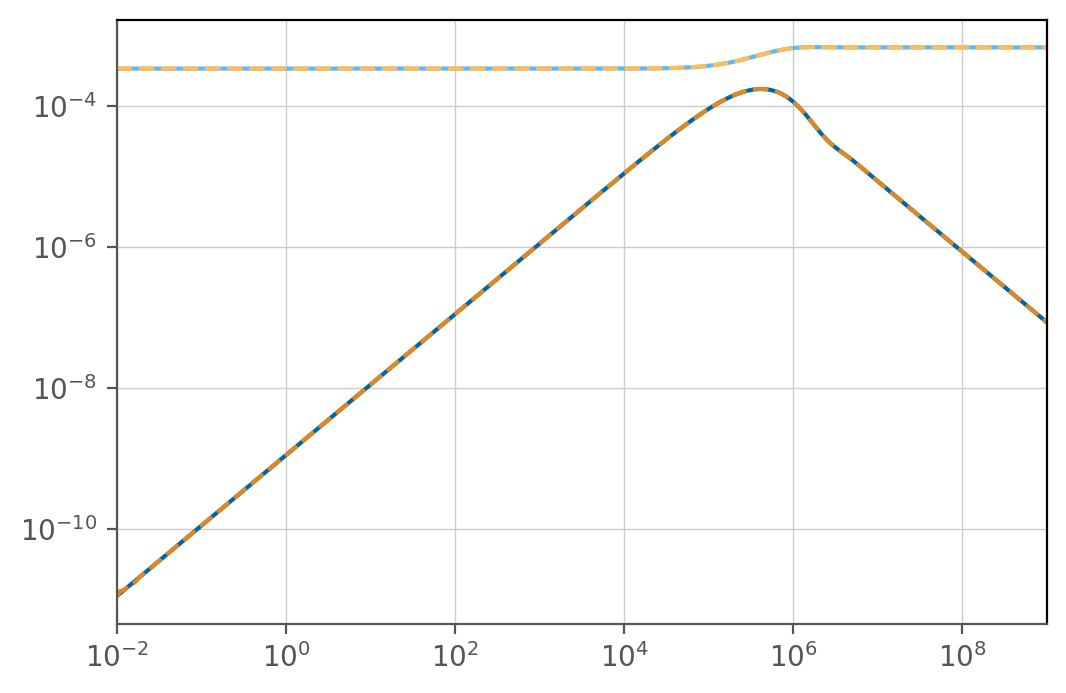

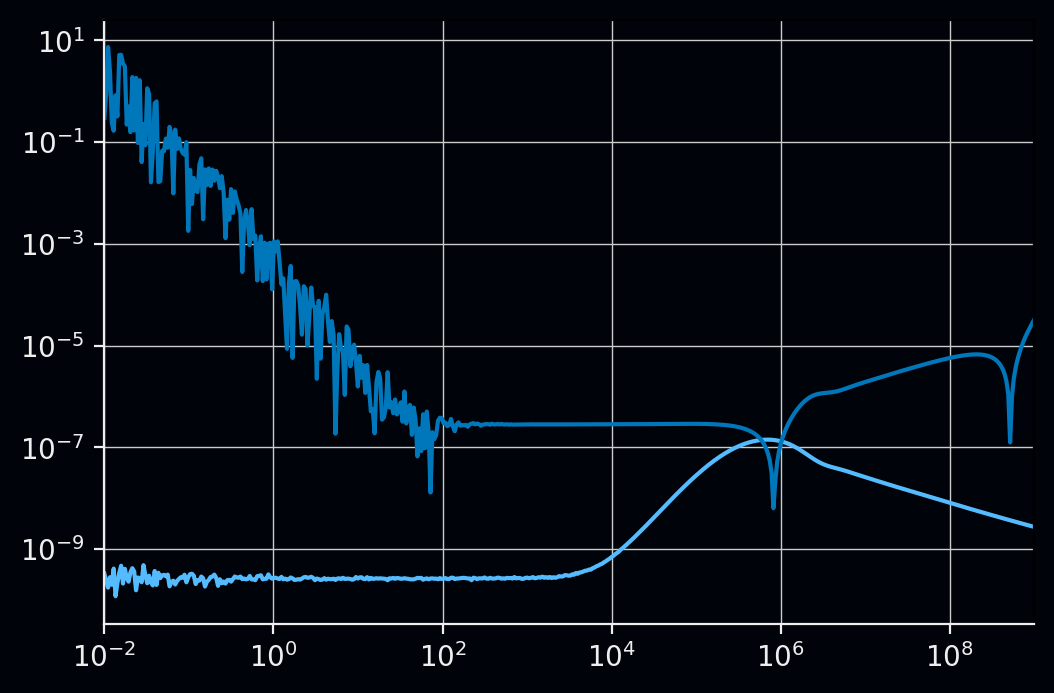

In [105]:
thick = []
res = [10]
freq = np.logspace(-2, 9, 500)
src = [0, 0, 0]
rec = [5, 5, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick, )
model.set_params(res)
model.set_params_air(1e15, 1, 1)
model.set_source(vmd, src)
model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "y", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hy(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()

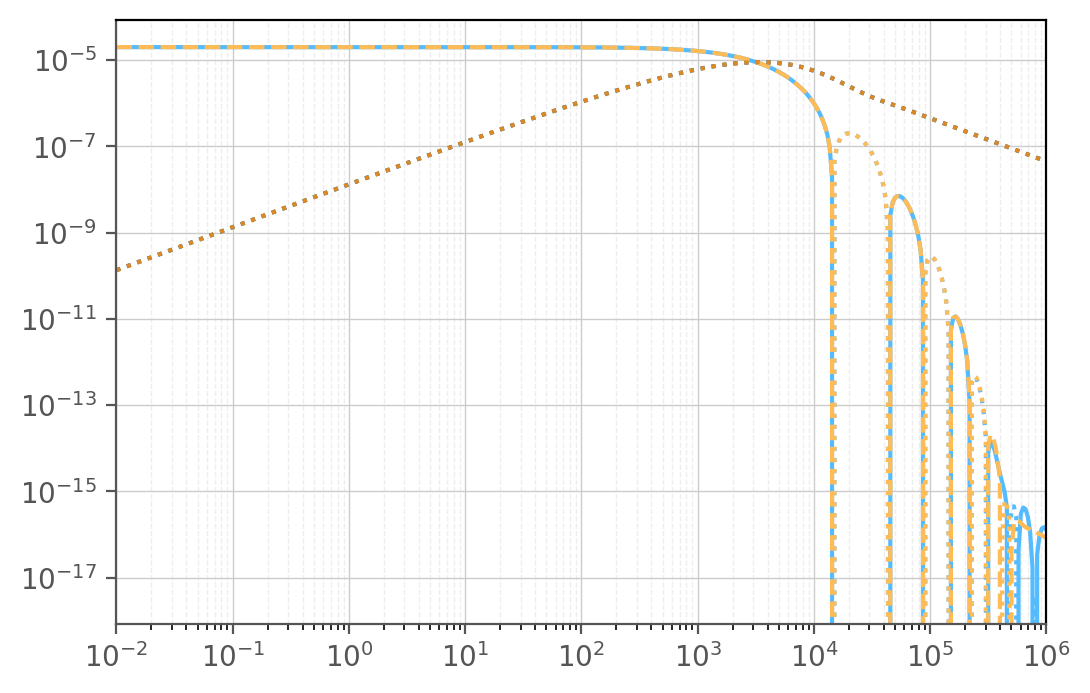

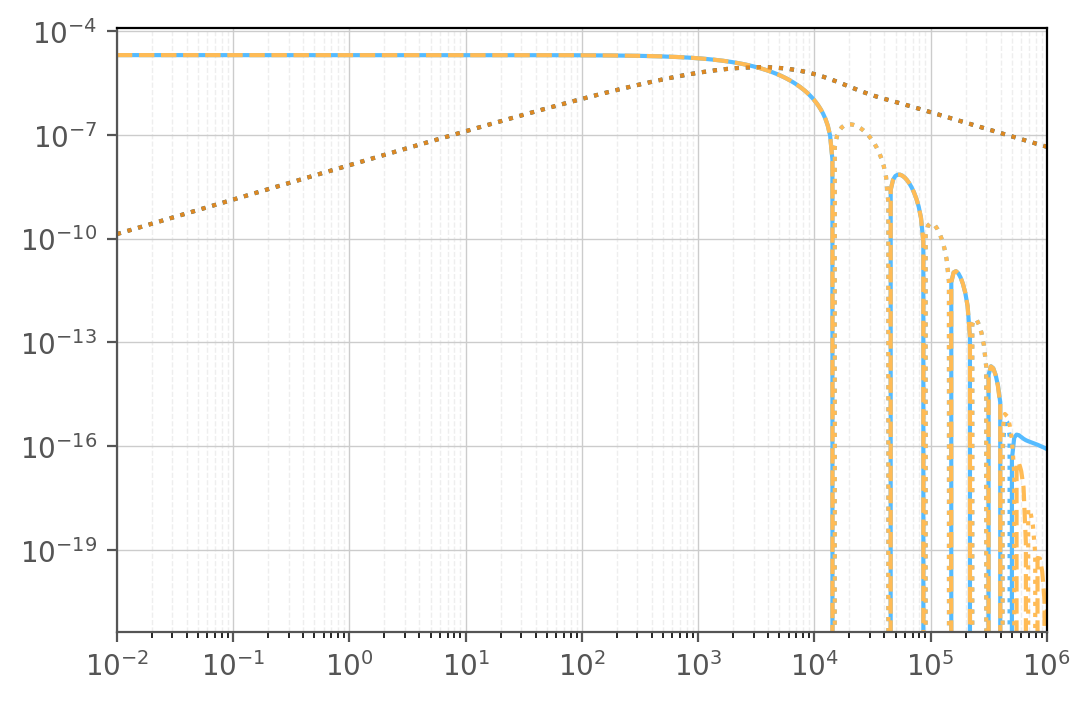

In [106]:
thick = []
res = [10]
freq = np.logspace(-2,6,400)
length = 1
src = [[-length/2, 0, 0], [length/2, 0, 0]]
rec = [30, 50, 0]
EH = "H"
xyz = "z"

s = GroundedWire(1)
model = emu.create_model(thick)
model.set_params(res)
#model.set_params_air(1e20,1,1)
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

s = AED(1, length, 0, 0)
src = [0, 0, 0]
model = emu.create_model(thick)
model.set_params(res)
model.set_params
model.set_source(s, src)
model.change_dlf_filter(hankel_dlf="werthmuller_201")
em_ed = model.fdem(EH, xyz, rec, freq)

em_an = analytical.SurfaceHEDx(res[0], rec[:2], length).fdem_hz(freq)

fig = stylishplot.fdem_plot(freq, em_gw, em_ed)

fig = stylishplot.fdem_plot(freq, em_ed, em_an)

In [107]:
30 / (30 ** 2 + 50 ** 2)** 0.5

0.5144957554275266

In [108]:

thick = [1000, 100]
res = [100, 1, 100]
freq = np.logspace(-2,5,400)
src = [[-500, 0, 0.01], [500, 0, 0.01]]
rec = [0, 1000, 0]
EH = "H"
xyz = "y"

vmd = GroundedWire(1, 1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
model.change_dlf_filter(hankel_dlf="anderson_801")
em_gw = model.fdem(EH, xyz, rec, freq)

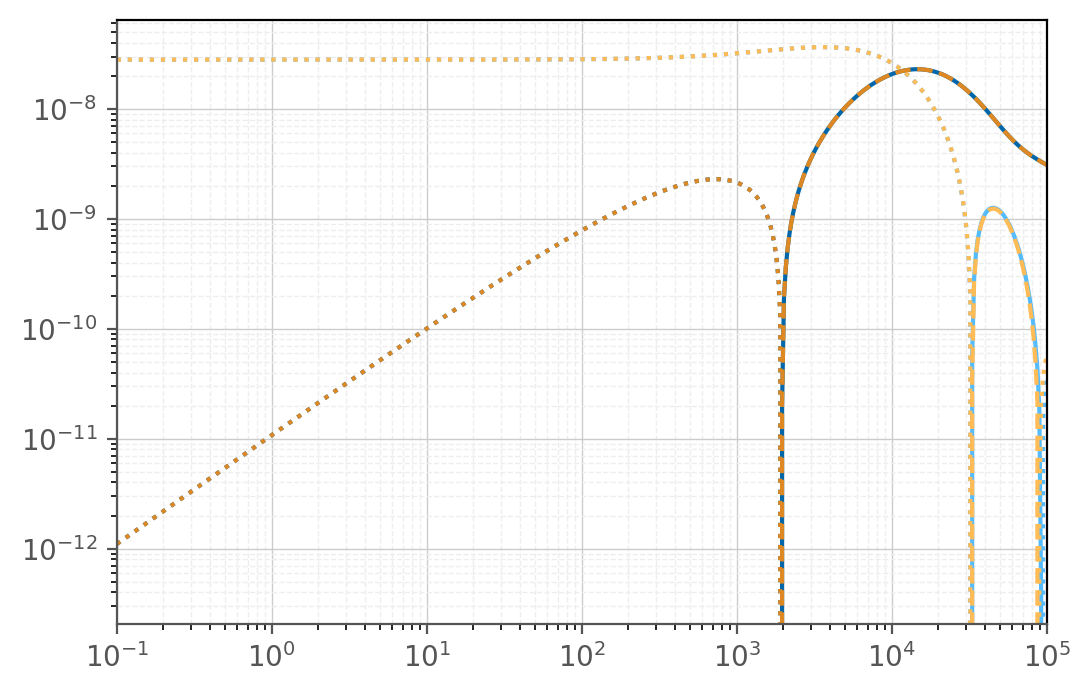

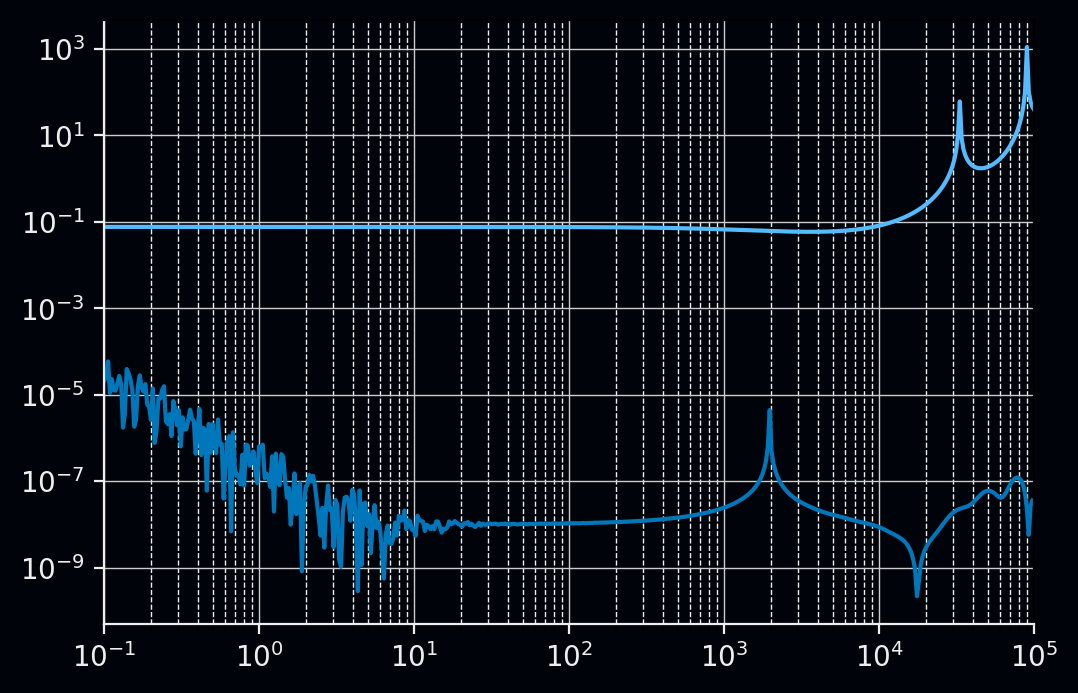

In [109]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = VMD(1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
hz = model.fdem("H", "z", rec, freq)

hz_ideal = analytical.SurfaceVMD(res[0], rec[:2]).fdem_hz(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()


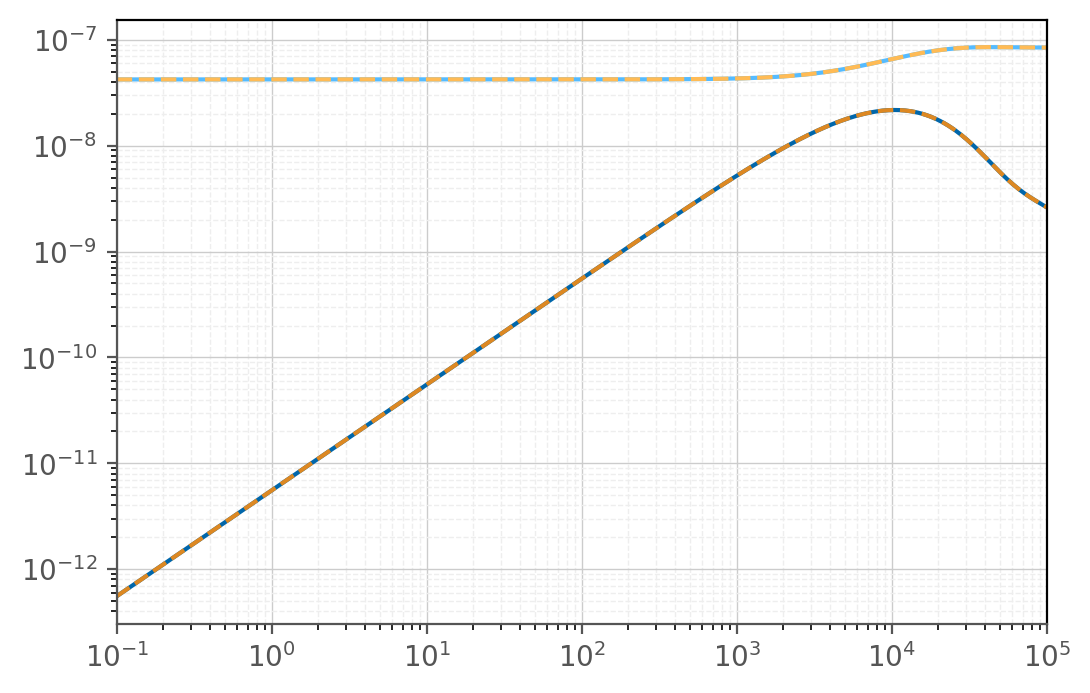

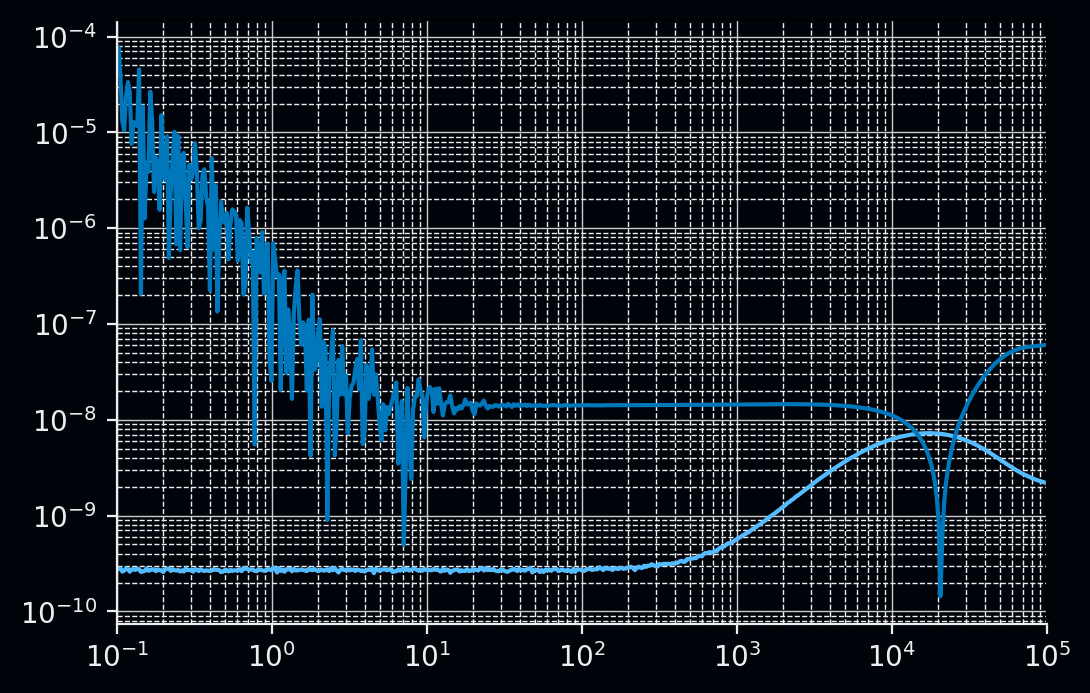

In [110]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = HMD(1, 0)
model = emu.create_model(thick)
model.set_params(res)
model.set_params_air(1e20, 1, 1)
model.set_source(vmd, src)
model.change_dlf_filter("werthmuller_201")
hz = model.fdem("H", "y", rec, freq)

hz_ideal = analytical.SurfaceHMDx(res[0], rec[:2]).fdem_hy(freq)

fig = stylishplot.fdem_plot(freq, hz, hz_ideal)
plt.show()

fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()

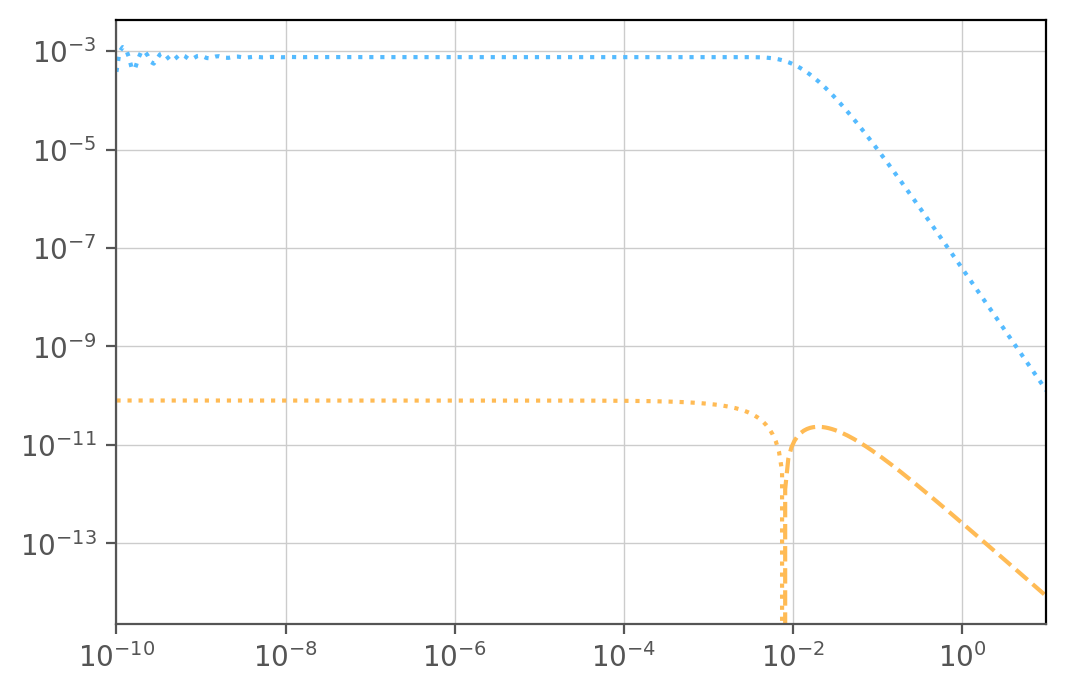

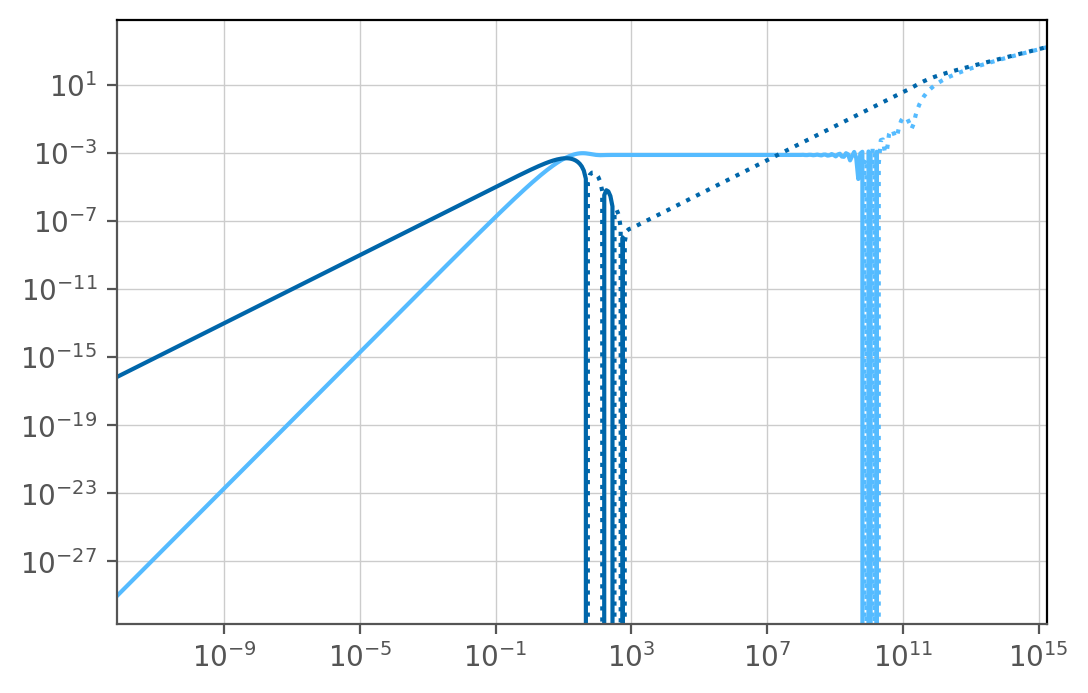

In [122]:
thick = []
res = [10]
time = np.logspace(-10,1, 300)
src = [[-100, 0, 0], [100, 0, 0]]
rec = [0, 1000, 0]

vmd = GroundedWire(1, ontime=-1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
hz = model.tdem("H", "z", rec, time, time_derivative=True)

hz_an = analytical.SurfaceVMD(res[0], [0, 1000]).tdem_hz(time)

fig = stylishplot.fdem_plot(time, hz, hz_an)

hz_fd = model.emf_fd_normalized
freq = model.frequency_

fig = stylishplot.fdem_plot(freq, hz_fd)


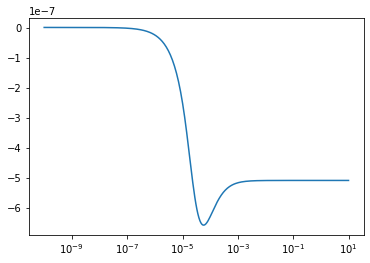

In [112]:
plt.plot(time, hz)
plt.xscale("log")

In [113]:
x = {"a":1, "b":2}
for k in x:
    print(k)

a
b


In [114]:
"a" in x

True

In [115]:
%%time
thick = []
res = [10]
time = np.logspace(-10,1, 300)
src = [10, 0, 0]
rec = [30, 50, 0]

vmd = VMD(1, 1)
model = emu.create_model(thick)
model.set_params(res)
model.set_source(vmd, src)
hz = model.tdem("H", "z", rec, time)


CPU times: user 17 ms, sys: 9.51 ms, total: 26.6 ms
Wall time: 21.1 ms


In [116]:
import numpy as np
from scipy import integrate, interpolate

def compute_fdwave(ontime, waveform, omega):
    margin = 5e-2
    ontime = np.hstack([ontime[0]-margin, ontime, ontime[-1]+margin])
    waveform = np.hstack([0, waveform, 0])
    waveform_func = interpolate.interp1d(ontime, waveform, kind='linear')
    a = ontime[0]
    b = ontime[-1]
    def fdwave(omega, waveform_func, a, b):
        def integrant_real(t, waveform_func, omega):
            dt = 5.e-5
            wave_tder = (waveform_func(t+dt)-waveform_func(t-dt)) / (2*dt)
            f = wave_tder / (1.j*omega) * np.exp(-1j * omega * t)
            return f.real

        def integrant_imag(t, waveform_func, omega):
            dt = 5.e-5
            wave_tder = (waveform_func(t+dt)-waveform_func(t-dt)) / (2*dt)
            f = wave_tder / (1.j*omega) * np.exp(-1j * omega * t)
            return f.imag

        waveform_fd_real, _ = integrate.quad(
                            integrant_real, a, b, args=(waveform_func, omega))
        waveform_fd_imag, _ = integrate.quad(
                            integrant_imag, a, b, args=(waveform_func, omega))

        waveform_fd = waveform_fd_real + waveform_fd_imag * 1.j
        return waveform_fd

    fdwave = np.vectorize(fdwave, excluded=["waveform_func", "a", "b"])
    fdwave_value = fdwave(omega, waveform_func, a, b)
    return fdwave_value

In [117]:
sys.path.append('../')

import emulatte as emu
from emulatte.source import *
from emulatte.halfspace import analytical
from emulatte.dlf import loader


waveform = np.array([0, 0.3, 0.55, 1., 0.8, 0.5, 0])
ontime = np.array([-1, -0.85, -0.7, -0.3, -0.2, -0.1, -0.])
waveform_func = interpolate.interp1d(ontime, waveform, kind='linear')

time = np.linspace(-1,0.0001,20)
base, cos, sin = loader.load_sin_cos_filter("key_time_201")

nf = len(base)
ntime = len(time)
time_inv = - time[::-1]

mat = np.zeros((ntime, nf), dtype=complex)

for i in range(ntime):
    omega = base / time_inv[i]
    fd_ans = compute_fdwave(ontime, waveform, omega)
    mat[i, :] = fd_ans

td_ans1 = 1/np.pi * mat.real @ cos / time_inv + 1/np.pi * mat.imag @ sin / time_inv
td_ans2 = - 2/np.pi * mat.imag @ sin / time_inv
td_ans3 = 2/np.pi * mat.real @ cos / time_inv

/var/folders/3l/hvvcb_kj3z7d10qpttdz8xcm0000gn/T/ipykernel_13815/2385464495.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  waveform_fd_real, _ = integrate.quad(
/var/folders/3l/hvvcb_kj3z7d10qpttdz8xcm0000gn/T/ipykernel_13815/2385464495.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splittin

KeyboardInterrupt: 

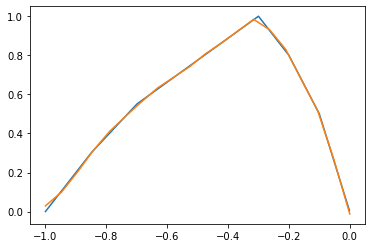

In [ ]:

waveform = np.array([0, 0.3, 0.55, 1., 0.8, 0.5, 0])
ontime = np.array([-1, -0.85, -0.7, -0.3, -0.2, -0.1, 0])
waveform_func = interpolate.interp1d(ontime, waveform, kind='linear')

dt = 0.001          # サンプリング周期 [s]

t = np.arange(-1, 0, dt) # 時間 [s]
x = waveform_func(t)

plt.plot(t, x)
plt.plot(time[::-1], td_ans1)

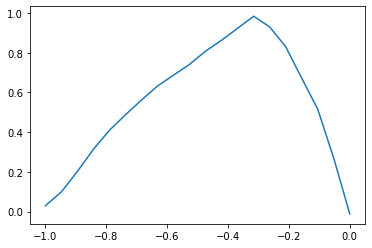

In [ ]:
plt.plot(time[::-1], td_ans1)

In [ ]:
mat.real

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])